# German credit risk

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import category_encoders as ce


In [2]:
data_file = "../csv/german_credit/german_credit_data.csv"
dataset = pd.read_csv(data_file, index_col=0)
ds = dataset.copy()
ds.head(15)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
5,35,male,1,free,NaN,NaN,9055,36,education
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment
7,35,male,3,rent,little,moderate,6948,36,car
8,61,male,1,own,rich,NaN,3059,12,radio/TV
9,28,male,3,own,little,moderate,5234,30,car


## EDA

In [3]:
ds.isna().any()

Age                 False
Sex                 False
Job                 False
Housing             False
Saving accounts      True
Checking account     True
Credit amount       False
Duration            False
Purpose             False
dtype: bool

### Age

<AxesSubplot:>

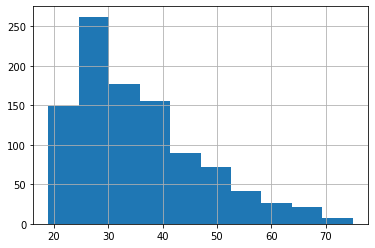

In [4]:
ds['Age'].hist()

### Sex

<AxesSubplot:>

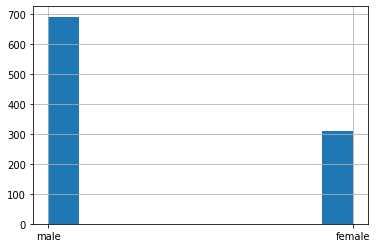

In [5]:
ds['Sex'].hist()

In [6]:
to_drop = []
decoded  = {}
decoded['Sex'] = {0: 'male', 1:'female'}
ds['Sex_num'] = ds['Sex'].apply(lambda x: 0 if x == 'male' else 1)
to_drop.append('Sex')

### Job

<AxesSubplot:>

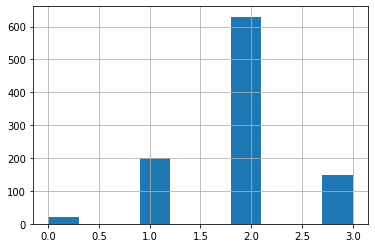

In [7]:
ds['Job'].hist()

### Housing

<AxesSubplot:>

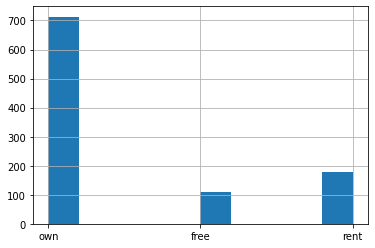

In [8]:
ds['Housing'].hist()

In [9]:
decoded['Housing'] = {0:'own', 1:'free', 2:'rent'}
ds['Housing_num'] = ds['Housing'].apply(lambda x: 0 if x == 'own' else 1 if x == 'free' else 2)
to_drop.append('Housing')

### Saving accounts

<AxesSubplot:>

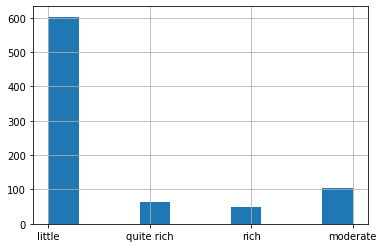

In [10]:
ds['Saving accounts'].hist()

In [11]:
ds['Saving accounts'].fillna('no', inplace=True)

<AxesSubplot:>

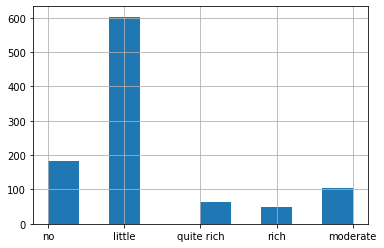

In [12]:
ds['Saving accounts'].hist()

In [13]:
decoded['Savings'] = {0:'no', 1: 'little', 2:"quite rich", 3: 'rich'}
savings = {'no': 0, 'little':1, 'moderate':2,  'quite rich': 3, 'rich': 4}
ds['Savings_num'] = ds['Saving accounts'].apply(savings.get)

<AxesSubplot:>

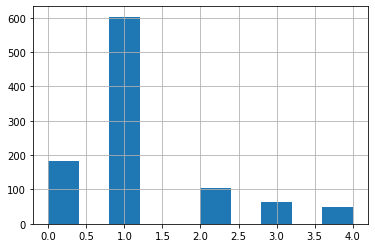

In [14]:
ds['Savings_num'].hist()

### Checking account

<AxesSubplot:>

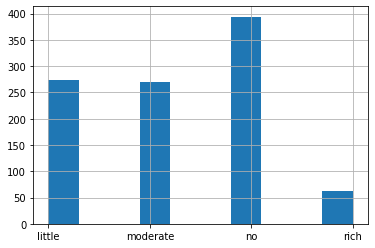

In [15]:
ds['Checking account'].fillna('no', inplace=True)
ds['Checking account'].hist()

In [16]:
checkings = {'no': 0, 'little':1, 'moderate':2, 'rich': 3}
ds['Checking_num'] = ds['Checking account'].apply(checkings.get)
decoded['Checkings'] = checkings

<AxesSubplot:>

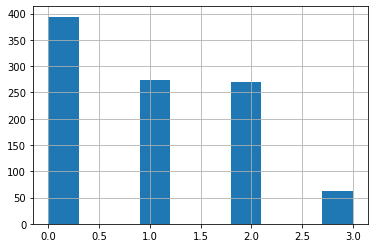

In [17]:
ds['Checking_num'].hist()

### Credit amount

<AxesSubplot:>

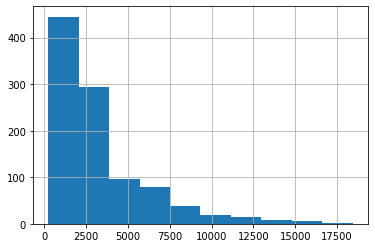

In [18]:
ds['Credit amount'].hist()

<AxesSubplot:>

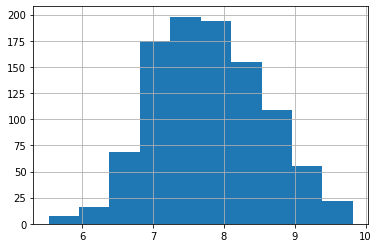

In [19]:
np.log(ds['Credit amount']).hist()

In [20]:
# ds['Credit_amount_log'] = np.log(ds['Credit amount'])
# to_drop.append('Credit amount')

### Прямо, идеальный пример логнормального распределения

### Duration

<AxesSubplot:>

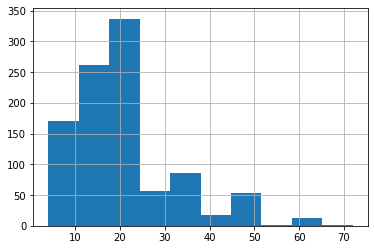

In [21]:
ds['Duration'].hist()

In [22]:
to_drop.extend(['Checking account', 'Saving accounts'])

### Purpose

<AxesSubplot:>

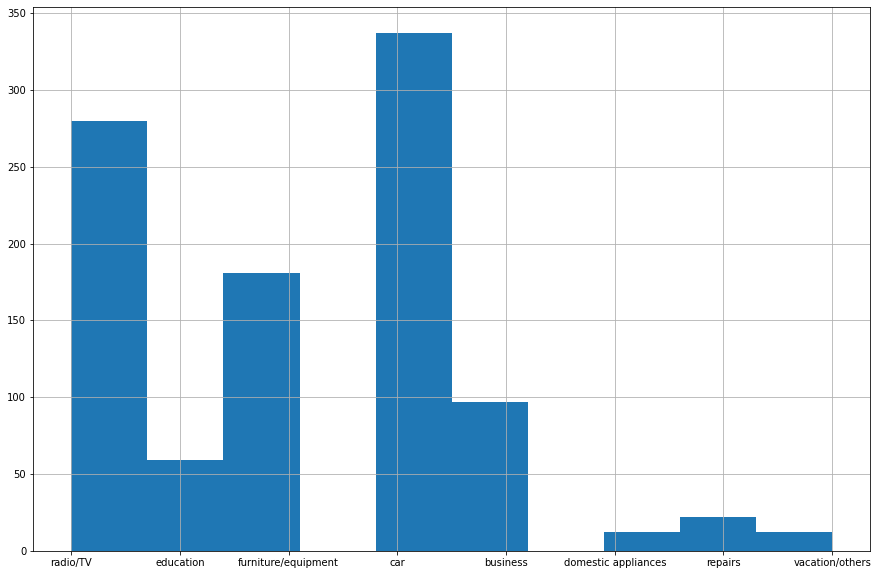

In [23]:
plt.figure(figsize=(15,10))
ds['Purpose'].hist()

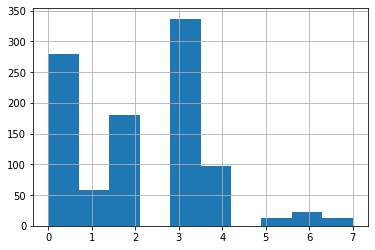

In [24]:
purpose = dict(zip(ds['Purpose'].unique(), range(len(ds['Purpose'].unique()))))
ds['Purpose_num'] = ds['Purpose'].apply(purpose.get)
ds['Purpose_num'].hist()
decoded['Purpose'] = purpose

In [25]:
to_drop

['Sex', 'Housing', 'Checking account', 'Saving accounts']

In [26]:
to_drop.append('Purpose')

In [27]:
ds.drop(columns=to_drop)

,Age,Job,Credit amount,Duration,Sex_num,Housing_num,Savings_num,Checking_num,Purpose_num
0,67,2,1169,6,0,0,0,1,0
1,22,2,5951,48,1,0,1,2,0
2,49,1,2096,12,0,0,1,0,1
3,45,2,7882,42,0,1,1,1,2
4,53,2,4870,24,0,1,1,1,3
...,...,...,...,...,...,...,...,...,...
995,31,1,1736,12,1,0,1,0,2
996,40,3,3857,30,0,0,1,1,3
997,38,2,804,12,0,0,1,0,0
998,23,2,1845,45,0,1,1,1,0


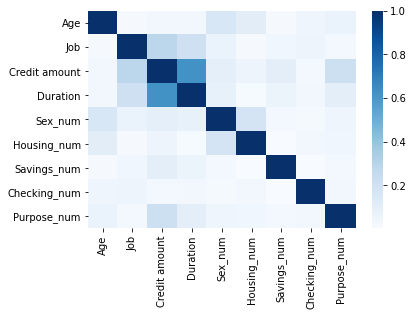

In [28]:
ax = sns.heatmap(ds.corr().abs(),cmap="Blues")

<Figure size 1080x1080 with 0 Axes>

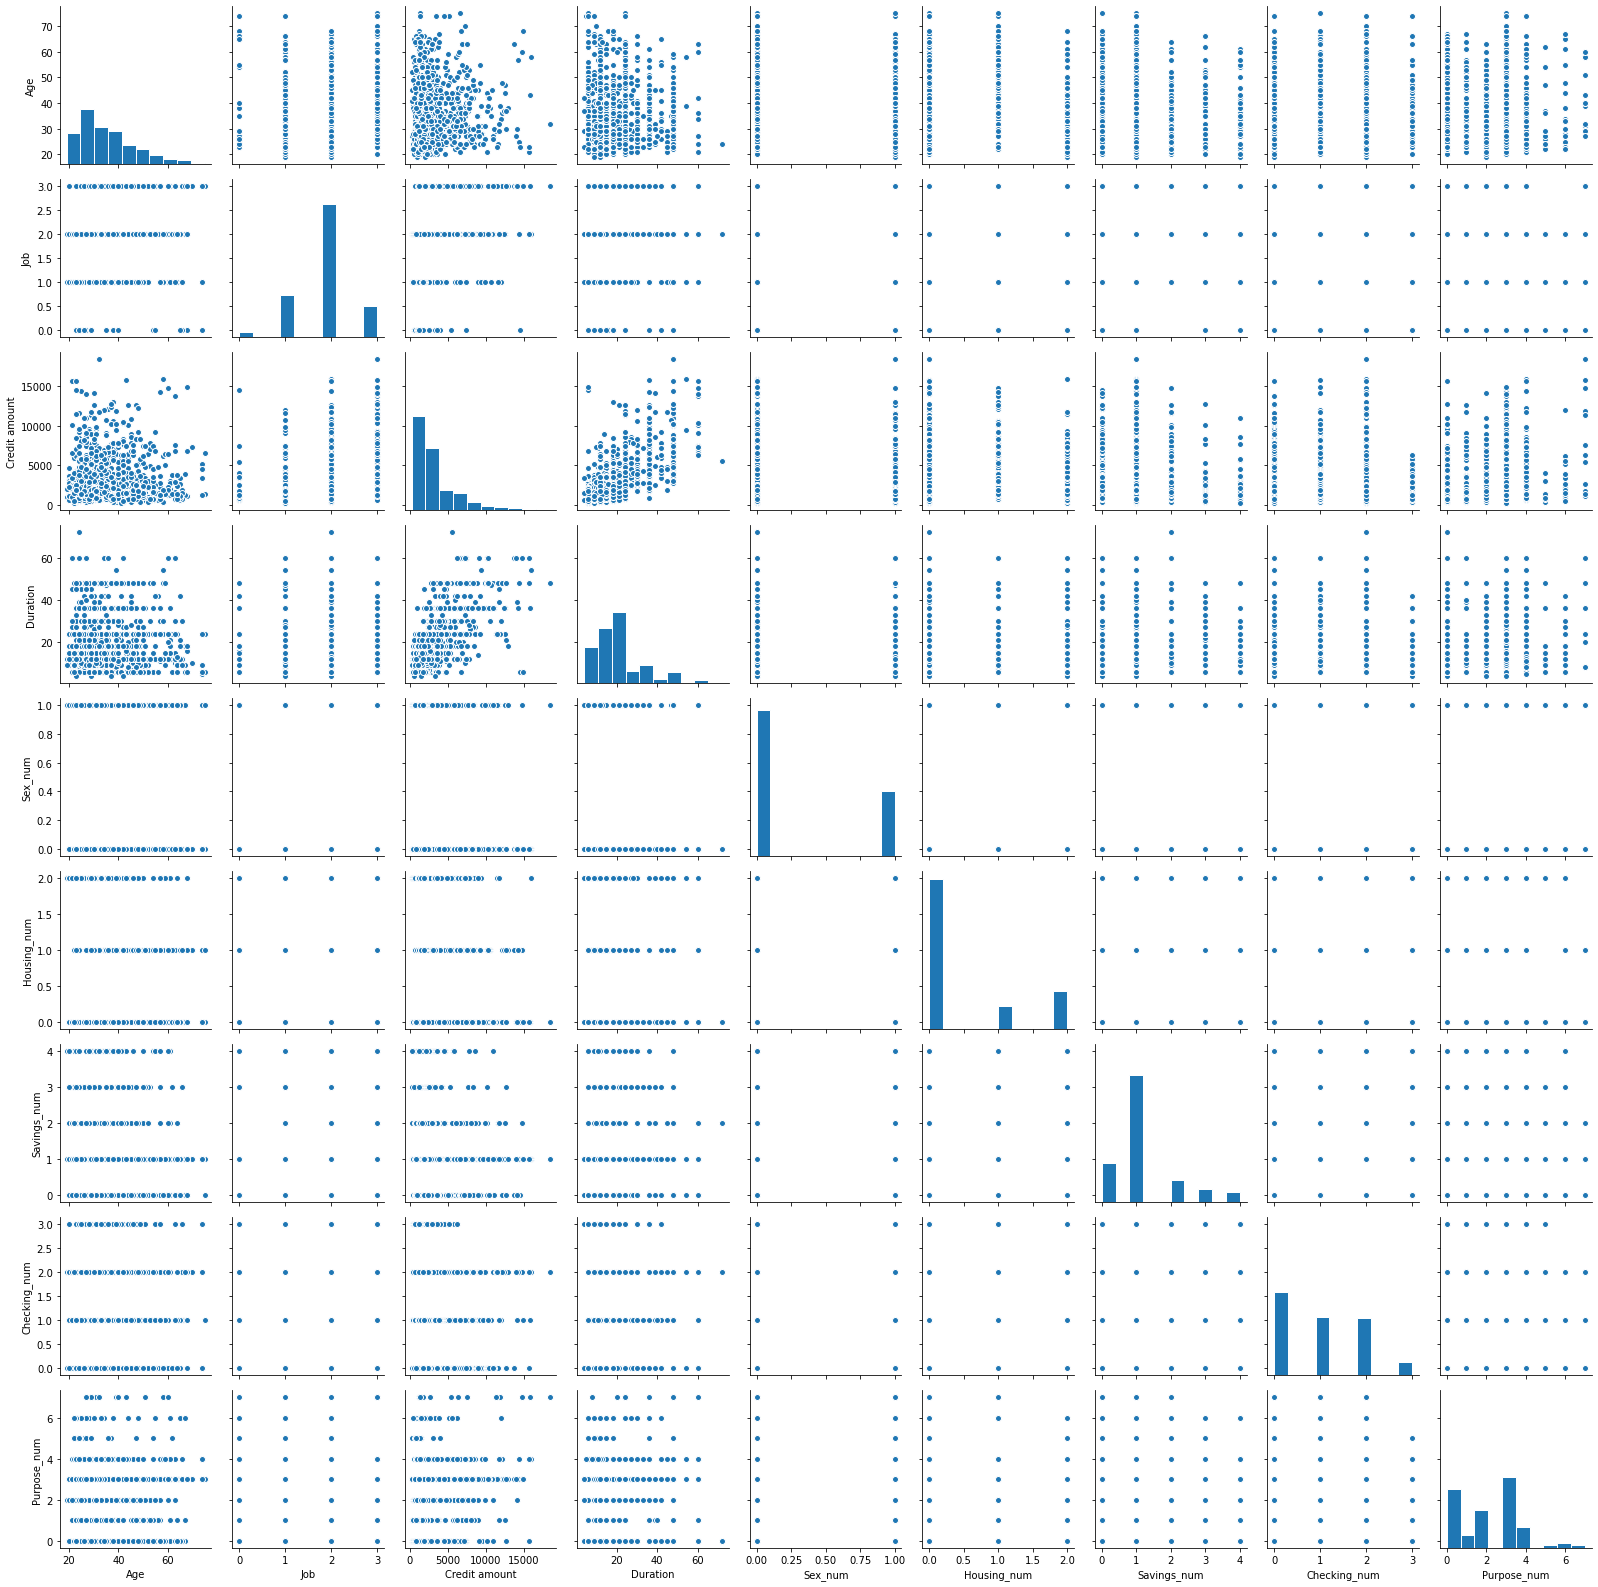

In [29]:
plt.figure(figsize=(15,15))
ax = sns.PairGrid(ds.drop(columns=to_drop), palette="Set2")
ax = ax.map_diag(plt.hist, edgecolor="w")
ax = ax.map_offdiag(plt.scatter, edgecolor="w")
plt.show()

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(ds.drop(columns=to_drop))


<AxesSubplot:>

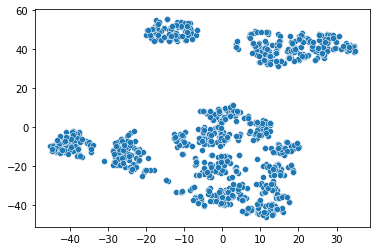

In [31]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
sns.scatterplot(X_tsne[:,0], X_tsne[:,1])

### Что-то мне подсказывает, что оптимальное число кластеров будет 3

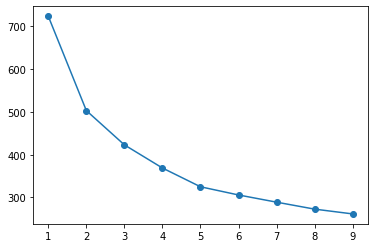

In [32]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

inert = []

for i in range(1,10):
    inert.append(KMeans(i).fit(X_scaled).inertia_)

plt.plot(range(1,10), inert, marker='o')

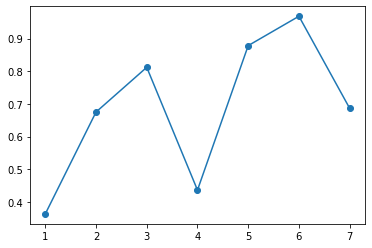

In [33]:
Di = []
for i in range(1,8):
    Di.append((inert[i] - inert[i+1]) / (inert[i -1] - inert[i]))
    
plt.plot(range(1,8), Di, marker='o')

In [34]:
ds['Cluster'] = KMeans(4).fit(X_scaled).labels_
ds['Cluster']

0      1
1      2
2      1
3      0
4      0
      ..
995    2
996    1
997    1
998    0
999    1
Name: Cluster, Length: 1000, dtype: int32

In [35]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=ds['Cluster'], palette="pris")

ValueError: pris is not a valid palette name

<AxesSubplot:>

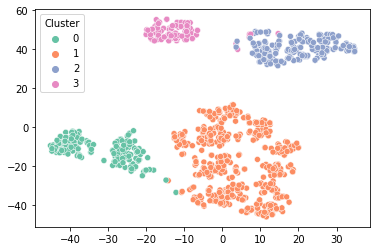

In [36]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=ds['Cluster'], palette="Set2")

<AxesSubplot:>

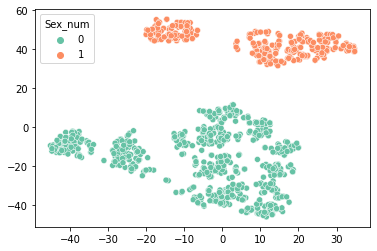

In [37]:
sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=ds['Sex_num'], palette="Set2")

In [ ]:
sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=ds['Housing_num'], palette="Set2")

In [ ]:
ds.groupby('Cluster').median().T

In [ ]:
decoded

In [ ]:
ds['Cluster'].value_counts(normalize=True).sort_index()

In [ ]:
sns.scatterplot(ds['Credit amount'].values,ds['Housing_num'].values, hue=ds['Cluster'], palette="Set1")

In [ ]:
sns.scatterplot(ds['Credit amount'].values,ds['Sex_num'].values, hue=ds['Cluster'], palette="Set1")

<AxesSubplot:>

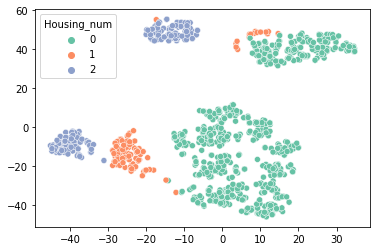

In [47]:
ds.groupby('Cluster').median().T

Cluster,0,1,2,3
Age,36,34,30,25
Job,2,2,2,2
Credit amount,2964,2346,1853,2139
Duration,21,18,18,18
Sex_num,0,0,1,1
Housing_num,1,0,0,2
Savings_num,1,1,1,1
Checking_num,1,1,1,1
Purpose_num,3,2,2,2


In [48]:
decoded

{'Sex': {0: 'male', 1: 'female'},
 'Housing': {0: 'own', 1: 'free', 2: 'rent'},
 'Savings': {0: 'no', 1: 'little', 2: 'quite rich', 3: 'rich'},
 'Checkings': {'no': 0, 'little': 1, 'moderate': 2, 'rich': 3},
 'Purpose': {'radio/TV': 0,
  'education': 1,
  'furniture/equipment': 2,
  'car': 3,
  'business': 4,
  'domestic appliances': 5,
  'repairs': 6,
  'vacation/others': 7}}

In [49]:
ds['Cluster'].value_counts(normalize=True).sort_index()

0    0.173
1    0.517
2    0.206
3    0.104
Name: Cluster, dtype: float64

<AxesSubplot:>

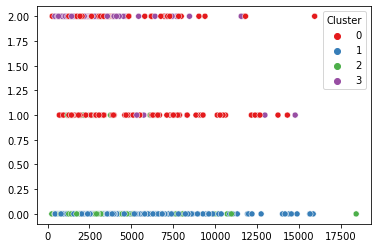

In [50]:
sns.scatterplot(ds['Credit amount'].values,ds['Housing_num'].values, hue=ds['Cluster'], palette="Set1")

<AxesSubplot:>

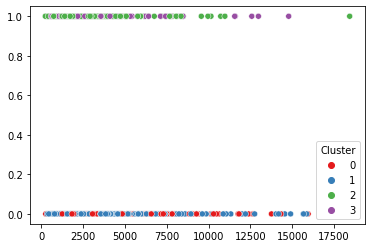

In [51]:
sns.scatterplot(ds['Credit amount'].values,ds['Sex_num'].values, hue=ds['Cluster'], palette="Set1")